# How Some Loan Features Affects Borrower's Annual Percentage Rate

## by Gerard Nonso Obiora

## Investigation Overview

I am interested in ascertaining the feature(s) that can affect BorrowerAPR (Annual Percentage Rate) for a loan. And I envisage that borrower's occupation, EmploymentStatus, EmploymentStatusDuration, term, loan original amount amongst other features might support my investigation into the main feature (BorrowerAPR) of interest.


## Dataset Overview

The dataset contains 113,937 loans with 81 features on each loan including loan amount, borrower rate (or interest rate), current loan status, borrower annual percentage rate, borrower income, and many others.

In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe 
prosper_loandata = pd.read_csv('prosperLoanData.csv')

In [3]:
# creates a copy of the dataset and would be used where cleaning needs are required accordingly
prosper_loandata_clean = prosper_loandata.copy()

## Plot of Borrower's Annual Percentage Rate
The plot shows that borrower's loans had APR between less of 0.1 and a little greater than 0.4. And in addition, the borrowerAPR distribition is sort of multimodal in nature.

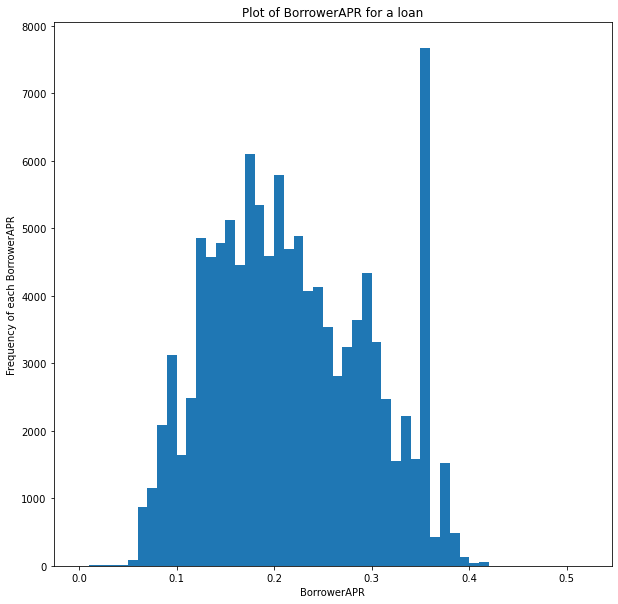

In [4]:
# standard-scaled plot displays
binsize = 0.01
bins = np.arange(0, prosper_loandata_clean['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = prosper_loandata_clean, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency of each BorrowerAPR')
plt.title('Plot of BorrowerAPR for a loan')
plt.show()

## Numerical Features Plot

The visualization shows that; borrowerAPR and loan original amount, stated monthly income and borrower rate, stated monthly income and borrower APR, borrower rate and loan original amount, are each pair negatively correlated. On the other hand; borrower APR and borrower rate, stated monthly income and loan original amount, are each pair positively correlated.

In [5]:
# Segments each variable into numerical and categorical variables
numeric_variables = ['BorrowerAPR', 'StatedMonthlyIncome', 'BorrowerRate', 'LoanOriginalAmount']
categorical_variables = ['Occupation', 'EmploymentStatus', 'LoanStatus', 'EmploymentStatusDuration', 'Term']

In [6]:
# Working with the subset of the dataset features of interest
list_of_columns = ['BorrowerAPR', 'StatedMonthlyIncome', 'BorrowerRate', 'LoanOriginalAmount', 'Occupation', 'LoanStatus', 
                   'EmploymentStatus', 'EmploymentStatusDuration', 'Term']
loandata_subset = prosper_loandata_clean[list_of_columns]

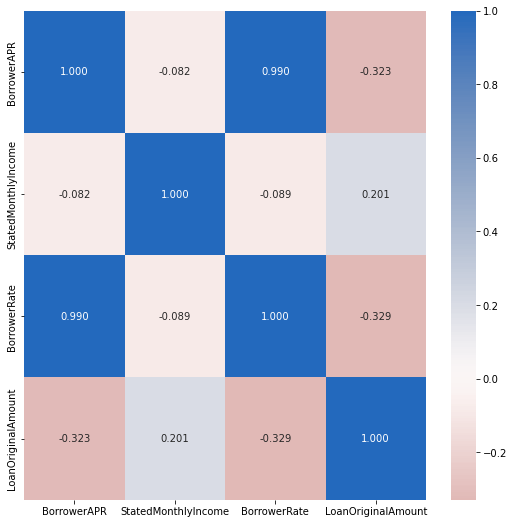

In [7]:
# correlation plot of the numerical variables
plt.figure(figsize = [9, 9])
sns.heatmap(prosper_loandata_clean[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Term and original loan amount against BorrowerAPR

Plot shows that BorrowerAPR decreases with increase in loan original amount (this is a negative correlation). And term has no effect on the other two features.

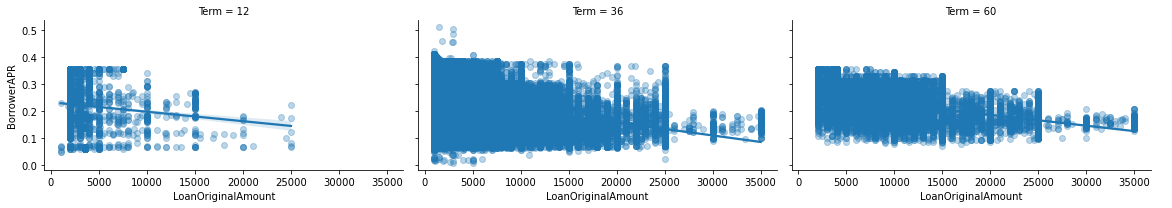

In [8]:
# Plot of Term, borrowerAPR and loanoriginalamount
g=sns.FacetGrid(data=loandata_subset, col='Term', col_wrap=3, height=3, aspect=1.8)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.3})
g.add_legend();

In [11]:
# Converts the notebook to a slideshow
!jupyter nbconvert GERARD_NONSO_OBIORA_PROJECT_THREE_WORK(Part_II_slide_deck).ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook GERARD_NONSO_OBIORA_PROJECT_THREE_WORK(Part_II_slide_deck).ipynb to slides
[NbConvertApp] Writing 710415 bytes to GERARD_NONSO_OBIORA_PROJECT_THREE_WORK(Part_II_slide_deck).slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\GUMCO\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\GUMCO\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\GUMCO\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\GUMCO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\GUMCO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, i